In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('final_cleaned_data.csv')

In [3]:
df

,Unnamed: 0,listedAt,daysOnMarket,availableFrom,street,price,borough,neighborhood,zip,propertyType,...,Hispanic or Latino_ratio,Population Below Poverty Level_ratio,Employed_ratio,Unemployed_ratio,High School Graduate (Age 25+)_ratio,Bachelor’s Degree (Age 25+)_ratio,Graduate or Professional Degree (Age 25+)_ratio,Never Married_ratio,Currently Married_ratio,Divorced_ratio
0,0,2024-11-25,1.0,2024-11-25,171 East 96th Street #4A,1855.0,Brooklyn,brownsville,11212,rental,...,0.194808,0.324774,0.369616,0.061293,0.200164,0.079363,0.002393,0.188141,0.100302,0.026939
1,1,2024-11-22,4.0,2024-11-22,93 East 96th Street #11,2235.0,Brooklyn,brownsville,11212,rental,...,0.194808,0.324774,0.369616,0.061293,0.200164,0.079363,0.002393,0.188141,0.100302,0.026939
2,2,2024-11-22,4.0,2024-11-22,501 Saratoga Avenue #B,1750.0,Brooklyn,brownsville,11212,rental,...,0.194808,0.324774,0.369616,0.061293,0.200164,0.079363,0.002393,0.188141,0.100302,0.026939
3,3,2024-11-20,6.0,2024-11-20,1115 Willmohr Street #2P,1850.0,Brooklyn,brownsville,11212,rental,...,0.194808,0.324774,0.369616,0.061293,0.200164,0.079363,0.002393,0.188141,0.100302,0.026939
4,4,2024-11-19,7.0,2024-11-19,1075 Clarkson Avenue #2B,3000.0,Brooklyn,brownsville,11212,rental,...,0.194808,0.324774,0.369616,0.061293,0.200164,0.079363,0.002393,0.188141,0.100302,0.026939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7837,7837,NaN,9.0,2024-11-14 00:00:00,12-1 26th Ave #2,4400.0,Queens,NaN,11102,apartment,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7838,7838,NaN,NaN,2024-11-15 00:00:00,12-20 Astoria Blvd #2A,3500.0,Queens,NaN,11102,apartment,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7839,7839,NaN,5.0,2024-11-18 00:00:00,11 Maiden Ln APT 6B,3750.0,Manhattan,NaN,10038,apartment,...,0.111040,0.195433,0.538791,0.028702,0.060532,0.279527,0.011095,0.239472,0.145440,0.017179
7840,7840,NaN,NaN,NaN,88 Fulton St #TOWNHOUSE 1,3200.0,Manhattan,NaN,10038,apartment,...,0.111040,0.195433,0.538791,0.028702,0.060532,0.279527,0.011095,0.239472,0.145440,0.017179


In [4]:
# Missing values
missing_count_per_column = df.isna().sum()
print(missing_count_per_column)

Unnamed: 0                                            0
listedAt                                           5052
daysOnMarket                                       1239
availableFrom                                      1463
street                                                0
price                                                 0
borough                                               0
neighborhood                                       5052
zip                                                   0
propertyType                                          0
beds                                                  0
baths                                                 0
latitude                                              0
longitude                                             0
amenities                                          5052
builtIn                                            5052
description                                        5052
hasVideo                                        

In [5]:
# Columns with 870 or 871 missing values (drop rows for these columns)
columns_with_870_871_missing = df.columns[df.isnull().sum().isin([870, 871])]

# Columns with 5052 missing values (drop these columns entirely)
columns_with_5052_missing = df.columns[df.isnull().sum() == 5052]

# Step 1: Drop rows where any of the 870/871 columns have missing values
df_cleaned = df.dropna(subset=columns_with_870_871_missing)

# Step 2: Drop columns with 5052 missing values
df_cleaned = df_cleaned.drop(columns=columns_with_5052_missing)

# Display the cleaned DataFrame's shape
print(f"Shape of cleaned DataFrame: {df_cleaned.shape}")

Shape of cleaned DataFrame: (6971, 45)


In [6]:
df_cleaned

,Unnamed: 0,daysOnMarket,availableFrom,street,price,borough,zip,propertyType,beds,baths,...,Hispanic or Latino_ratio,Population Below Poverty Level_ratio,Employed_ratio,Unemployed_ratio,High School Graduate (Age 25+)_ratio,Bachelor’s Degree (Age 25+)_ratio,Graduate or Professional Degree (Age 25+)_ratio,Never Married_ratio,Currently Married_ratio,Divorced_ratio
0,0,1.0,2024-11-25,171 East 96th Street #4A,1855.0,Brooklyn,11212,rental,1,1.0,...,0.194808,0.324774,0.369616,0.061293,0.200164,0.079363,0.002393,0.188141,0.100302,0.026939
1,1,4.0,2024-11-22,93 East 96th Street #11,2235.0,Brooklyn,11212,rental,2,1.0,...,0.194808,0.324774,0.369616,0.061293,0.200164,0.079363,0.002393,0.188141,0.100302,0.026939
2,2,4.0,2024-11-22,501 Saratoga Avenue #B,1750.0,Brooklyn,11212,rental,1,1.0,...,0.194808,0.324774,0.369616,0.061293,0.200164,0.079363,0.002393,0.188141,0.100302,0.026939
3,3,6.0,2024-11-20,1115 Willmohr Street #2P,1850.0,Brooklyn,11212,rental,1,1.0,...,0.194808,0.324774,0.369616,0.061293,0.200164,0.079363,0.002393,0.188141,0.100302,0.026939
4,4,7.0,2024-11-19,1075 Clarkson Avenue #2B,3000.0,Brooklyn,11212,rental,3,1.0,...,0.194808,0.324774,0.369616,0.061293,0.200164,0.079363,0.002393,0.188141,0.100302,0.026939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,7830,121.0,NaN,1027 Faile St APT 3,4070.0,Bronx,10459,apartment,4,1.0,...,0.673351,0.303268,0.398834,0.064545,0.133881,0.064083,0.000866,0.207451,0.126357,0.028654
7831,7831,6.0,2024-11-18 00:00:00,80 Tyrrell St #1,3800.0,Staten Island,10307,apartment,3,3.0,...,0.105524,0.046425,0.468655,0.004066,0.140969,0.136089,0.003321,0.148153,0.242765,0.031040
7839,7839,5.0,2024-11-18 00:00:00,11 Maiden Ln APT 6B,3750.0,Manhattan,10038,apartment,2,1.0,...,0.111040,0.195433,0.538791,0.028702,0.060532,0.279527,0.011095,0.239472,0.145440,0.017179
7840,7840,NaN,NaN,88 Fulton St #TOWNHOUSE 1,3200.0,Manhattan,10038,apartment,1,1.0,...,0.111040,0.195433,0.538791,0.028702,0.060532,0.279527,0.011095,0.239472,0.145440,0.017179


In [7]:
df_cleaned = df_cleaned.drop(['Unnamed: 0'], axis=1)
df_cleaned.head()

,daysOnMarket,availableFrom,street,price,borough,zip,propertyType,beds,baths,latitude,...,Hispanic or Latino_ratio,Population Below Poverty Level_ratio,Employed_ratio,Unemployed_ratio,High School Graduate (Age 25+)_ratio,Bachelor’s Degree (Age 25+)_ratio,Graduate or Professional Degree (Age 25+)_ratio,Never Married_ratio,Currently Married_ratio,Divorced_ratio
0,1.0,2024-11-25,171 East 96th Street #4A,1855.0,Brooklyn,11212,rental,1,1.0,40.662186,...,0.194808,0.324774,0.369616,0.061293,0.200164,0.079363,0.002393,0.188141,0.100302,0.026939
1,4.0,2024-11-22,93 East 96th Street #11,2235.0,Brooklyn,11212,rental,2,1.0,40.663817,...,0.194808,0.324774,0.369616,0.061293,0.200164,0.079363,0.002393,0.188141,0.100302,0.026939
2,4.0,2024-11-22,501 Saratoga Avenue #B,1750.0,Brooklyn,11212,rental,1,1.0,40.668506,...,0.194808,0.324774,0.369616,0.061293,0.200164,0.079363,0.002393,0.188141,0.100302,0.026939
3,6.0,2024-11-20,1115 Willmohr Street #2P,1850.0,Brooklyn,11212,rental,1,1.0,40.657349,...,0.194808,0.324774,0.369616,0.061293,0.200164,0.079363,0.002393,0.188141,0.100302,0.026939
4,7.0,2024-11-19,1075 Clarkson Avenue #2B,3000.0,Brooklyn,11212,rental,3,1.0,40.659825,...,0.194808,0.324774,0.369616,0.061293,0.200164,0.079363,0.002393,0.188141,0.100302,0.026939


In [8]:
df_cleaned.columns

Index(['daysOnMarket', 'availableFrom', 'street', 'price', 'borough', 'zip',
       'propertyType', 'beds', 'baths', 'latitude', 'longitude', 'hasVideo',
       'PhotosNum', 'Number of Households', 'Median Household Income',
       'Per Capita Income', 'Total Income Distribution', 'Median Gross Rent',
       'Median Home Value', 'Occupied Housing Units', 'Vacant Housing Units',
       'Owner-Occupied Units (value < $100,000)', 'Monthly Housing Costs',
       'Precinct', 'schools_in_precinct', 'nearby_subway_stations',
       'crime_rate', 'precinct_safety_rank', 'Median Age_ratio',
       'Male Population_ratio', 'Female Population_ratio', 'White Alone_ratio',
       'Black or African American Alone_ratio', 'Asian Alone_ratio',
       'Hispanic or Latino_ratio', 'Population Below Poverty Level_ratio',
       'Employed_ratio', 'Unemployed_ratio',
       'High School Graduate (Age 25+)_ratio',
       'Bachelor’s Degree (Age 25+)_ratio',
       'Graduate or Professional Degree (Age 25+)_r

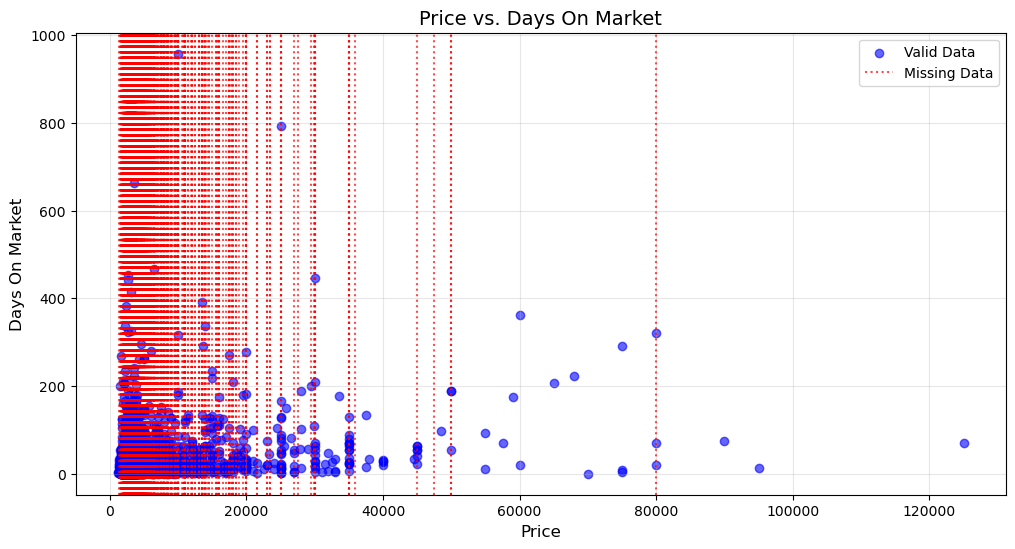

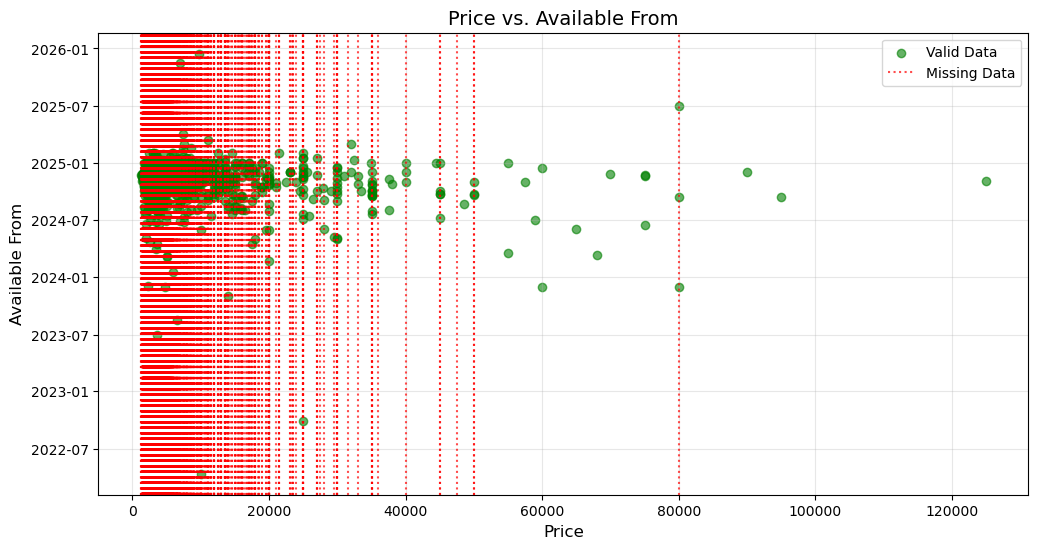

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure `availableFrom` is in datetime format
df_cleaned['availableFrom'] = pd.to_datetime(df_cleaned['availableFrom'], errors='coerce')

# Plot 1: Price vs. daysOnMarket
plt.figure(figsize=(12, 6))
plt.scatter(df_cleaned['price'], df_cleaned['daysOnMarket'], alpha=0.6, label='Valid Data', color='blue')
# Add red dotted lines for missing values in daysOnMarket
missing_daysOnMarket = df_cleaned[df_cleaned['daysOnMarket'].isnull()]
for price in missing_daysOnMarket['price']:
    plt.axvline(x=price, color='red', linestyle='dotted', alpha=0.7, label='Missing Data')
plt.title('Price vs. Days On Market', fontsize=14)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Days On Market', fontsize=12)
plt.legend(['Valid Data', 'Missing Data'], loc='upper right')
plt.grid(alpha=0.3)
plt.show()

# Plot 2: Price vs. availableFrom
plt.figure(figsize=(12, 6))
plt.scatter(df_cleaned['price'], df_cleaned['availableFrom'], alpha=0.6, label='Valid Data', color='green')
# Add red dotted lines for missing values in availableFrom
missing_availableFrom = df_cleaned[df_cleaned['availableFrom'].isnull()]
for price in missing_availableFrom['price']:
    plt.axvline(x=price, color='red', linestyle='dotted', alpha=0.7, label='Missing Data')
plt.title('Price vs. Available From', fontsize=14)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Available From', fontsize=12)
plt.legend(['Valid Data', 'Missing Data'], loc='upper right')
plt.grid(alpha=0.3)
plt.show()

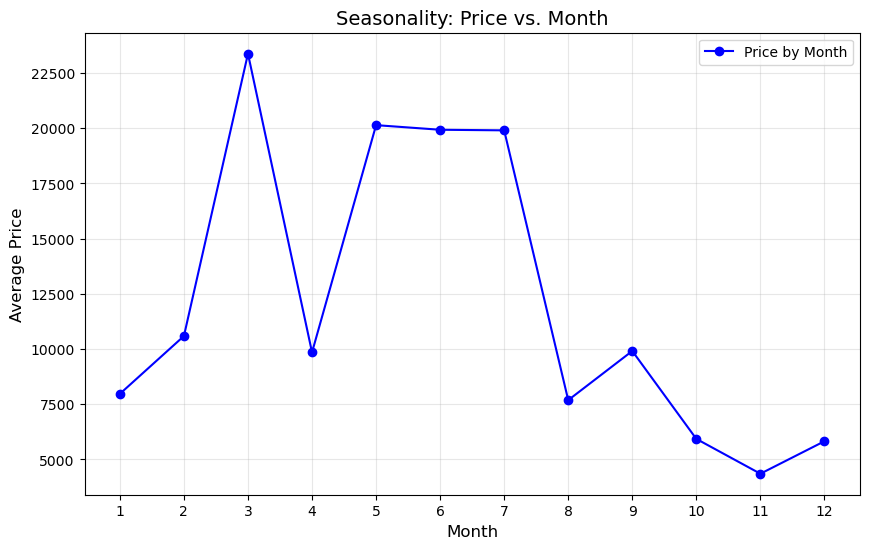

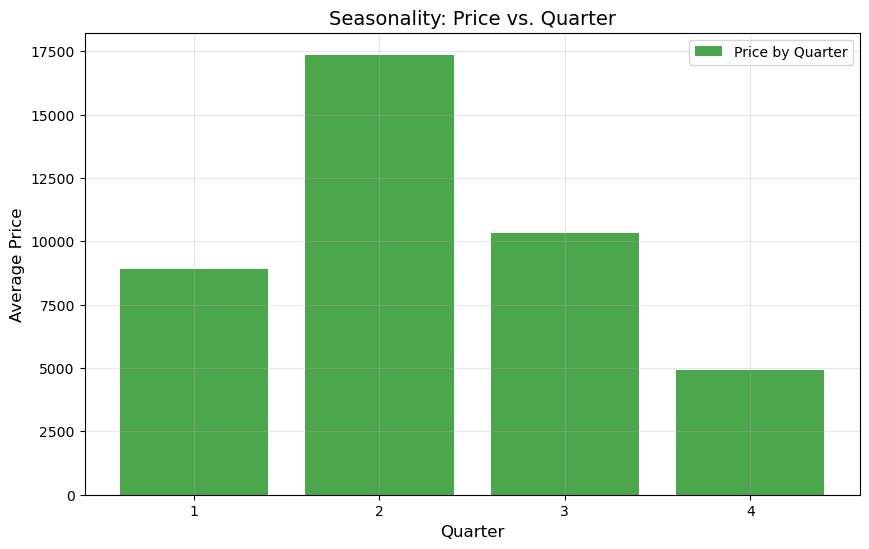

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure `availableFrom` is in datetime format
df_cleaned['availableFrom'] = pd.to_datetime(df_cleaned['availableFrom'], errors='coerce')

# Extract seasonal features
df_cleaned['month'] = df_cleaned['availableFrom'].dt.month
df_cleaned['quarter'] = df_cleaned['availableFrom'].dt.quarter

# Analyze price by month
price_by_month = df_cleaned.groupby('month')['price'].mean()

# Analyze price by quarter
price_by_quarter = df_cleaned.groupby('quarter')['price'].mean()

# Plot: Price vs. Month
plt.figure(figsize=(10, 6))
plt.plot(price_by_month.index, price_by_month.values, marker='o', color='blue', label='Price by Month')
plt.title('Seasonality: Price vs. Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.xticks(range(1, 13))
plt.grid(alpha=0.3)
plt.legend()
plt.show()

# Plot: Price vs. Quarter
plt.figure(figsize=(10, 6))
plt.bar(price_by_quarter.index, price_by_quarter.values, color='green', alpha=0.7, label='Price by Quarter')
plt.title('Seasonality: Price vs. Quarter', fontsize=14)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.xticks(range(1, 5))
plt.grid(alpha=0.3)
plt.legend()
plt.show()


The first graph (Price vs. Month) shows how the average property price varies across different months of the year. The reasons for the highs and lows can be linked to market dynamics, seasonality, and demand patterns. Here's a detailed explanation of why some months had high prices and others had low:

---

### **High Prices in March**
1. **End of Winter Moving Season**:
   - March often marks the end of the winter, and some buyers and renters may look to move before the spring market heats up.
   - This increased demand may drive prices up in March.

2. **Tax Refunds**:
   - Many people receive their tax refunds in March or April, giving them extra money to spend on homes or down payments, pushing up prices.

3. **Supply Constraints**:
   - During late winter, the supply of properties might still be relatively low compared to spring, causing prices to increase for the available listings.

---

### **Low Prices in April**
1. **Increase in Supply**:
   - Spring (April) is a popular season for homeowners to list properties. The sudden increase in supply may result in a temporary dip in prices.

2. **Shift in Buyer Behavior**:
   - Buyers may hold off during April, expecting more listings as the spring market progresses, reducing demand temporarily.

---

### **Relatively Stable Prices from May to July**
1. **Peak Homebuying Season**:
   - Summer months (May-July) are often considered peak homebuying and moving seasons. Families with children prefer to move during this period to settle before the school year begins.
   - High demand during this time can keep prices stable at elevated levels.

2. **Balanced Supply and Demand**:
   - As more properties are listed in the summer, the balance between supply and demand may prevent large price fluctuations.

---

### **Low Prices in Fall and Early Winter (October-November)**
1. **Seasonal Slowdown**:
   - Fall and early winter (October-November) often see less activity in the real estate market. Fewer people are looking to move due to holidays, colder weather, and the school year being underway.
   - Reduced demand can result in lower prices.

2. **Motivated Sellers**:
   - Sellers may be more willing to lower prices during the off-season to close deals, especially before the year ends.

---

### **Slight Recovery in December**
1. **End-of-Year Sales**:
   - December often sees a slight uptick in activity as buyers and sellers rush to close deals before the year ends for tax purposes.
   - Limited inventory during this time can also push prices slightly upward.

---

### **Key Takeaways**
- **March High**: Driven by limited winter supply and early spring demand.
- **April Low**: Increased listings dilute the market.
- **May-July Stability**: Peak demand during the moving season balances the market.
- **Fall-Winter Dip**: Lower demand due to seasonal factors.

Would you like to dive deeper into specific months or explore additional factors, like geographic variations or demand trends?

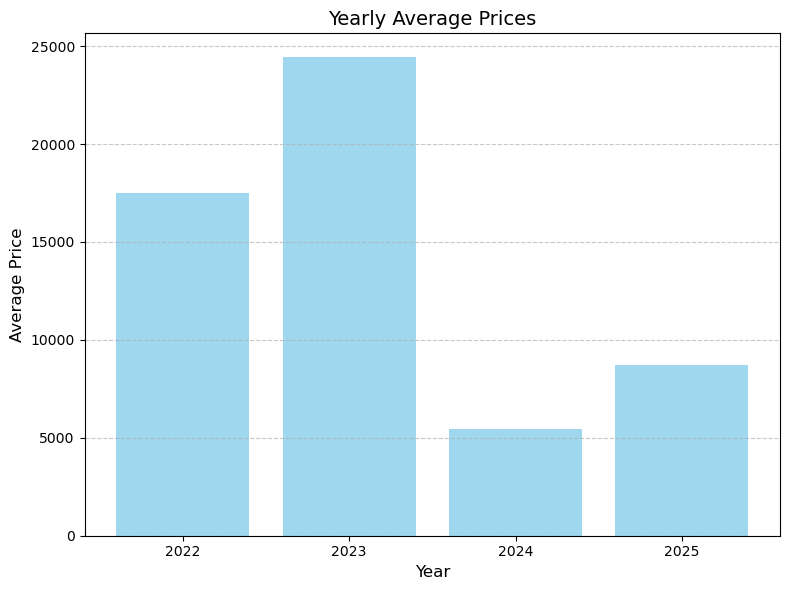

In [11]:
import matplotlib.pyplot as plt

# Ensure 'availableFrom' is in datetime format
df_cleaned['availableFrom'] = pd.to_datetime(df_cleaned['availableFrom'], errors='coerce')

# Extract year from 'availableFrom'
df_cleaned['year'] = df_cleaned['availableFrom'].dt.year

# Group by year and calculate average price
price_by_year = df_cleaned.groupby('year')['price'].mean()

# Plot the yearly trend
plt.figure(figsize=(8, 6))
plt.bar(price_by_year.index, price_by_year.values, color='skyblue', alpha=0.8)
plt.title('Yearly Average Prices', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.xticks(price_by_year.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [12]:
import numpy as np
import pandas as pd

# Ensure 'availableFrom' is in datetime format
df_cleaned['availableFrom'] = pd.to_datetime(df_cleaned['availableFrom'], errors='coerce')

# Extract month from 'availableFrom' for rows without missing values
df_cleaned['month_from_available'] = df_cleaned['availableFrom'].dt.month

# Calculate average price for each month
average_price_by_month = df_cleaned.groupby('month_from_available')['price'].mean()

# Map price to months based on seasonality
def assign_month_based_on_price(price):
    # Find the closest month by price
    return int((average_price_by_month - price).abs().idxmin())

# Fill missing 'availableFrom'
def fill_available_from(row):
    if pd.isnull(row['availableFrom']):
        # Assign the most likely month based on price
        likely_month = assign_month_based_on_price(row['price'])
        # Assign a fixed date (e.g., 15th of the month) in the identified month
        return pd.Timestamp(year=2024, month=likely_month, day=15)
    return row['availableFrom']

# Apply the function to fill missing values
df_cleaned['availableFrom'] = df_cleaned.apply(fill_available_from, axis=1)

# Drop helper column if no longer needed
df_cleaned.drop(columns=['month_from_available'], inplace=True)

# Display the updated DataFrame
print(df_cleaned[['price', 'availableFrom']].head())

    price availableFrom
0  1855.0    2024-11-25
1  2235.0    2024-11-22
2  1750.0    2024-11-22
3  1850.0    2024-11-20
4  3000.0    2024-11-19


In [13]:
# Missing values
missing_count_per_column = df_cleaned.isna().sum()
print(missing_count_per_column)

daysOnMarket                                       1090
availableFrom                                         0
street                                                0
price                                                 0
borough                                               0
zip                                                   0
propertyType                                          0
beds                                                  0
baths                                                 0
latitude                                              0
longitude                                             0
hasVideo                                              0
PhotosNum                                             0
Number of Households                                  0
Median Household Income                               0
Per Capita Income                                     0
Total Income Distribution                             0
Median Gross Rent                               

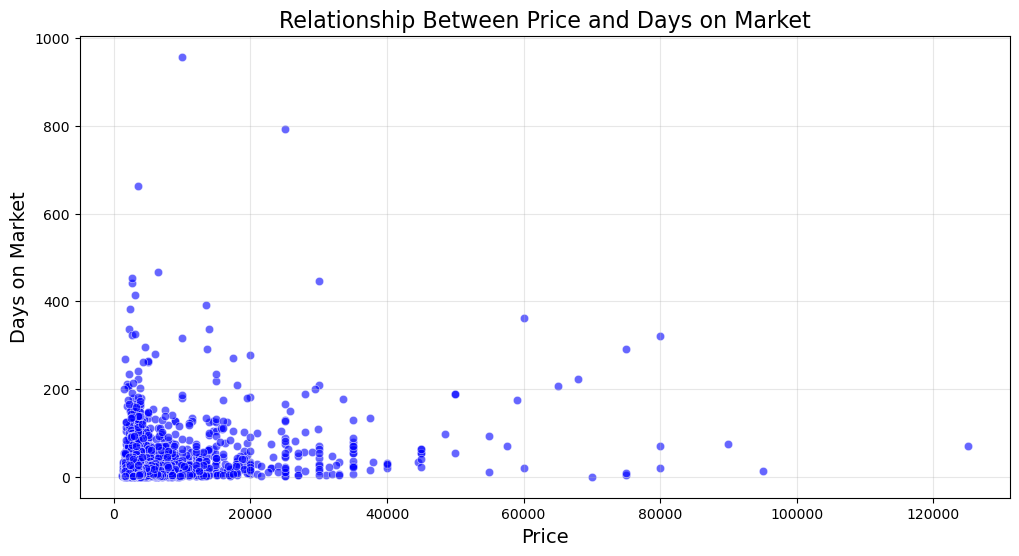

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of daysOnMarket vs. price
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_cleaned, x='price', y='daysOnMarket', alpha=0.6, color='blue')

# Add labels and title
plt.title('Relationship Between Price and Days on Market', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Days on Market', fontsize=14)
plt.grid(alpha=0.3)

plt.show()


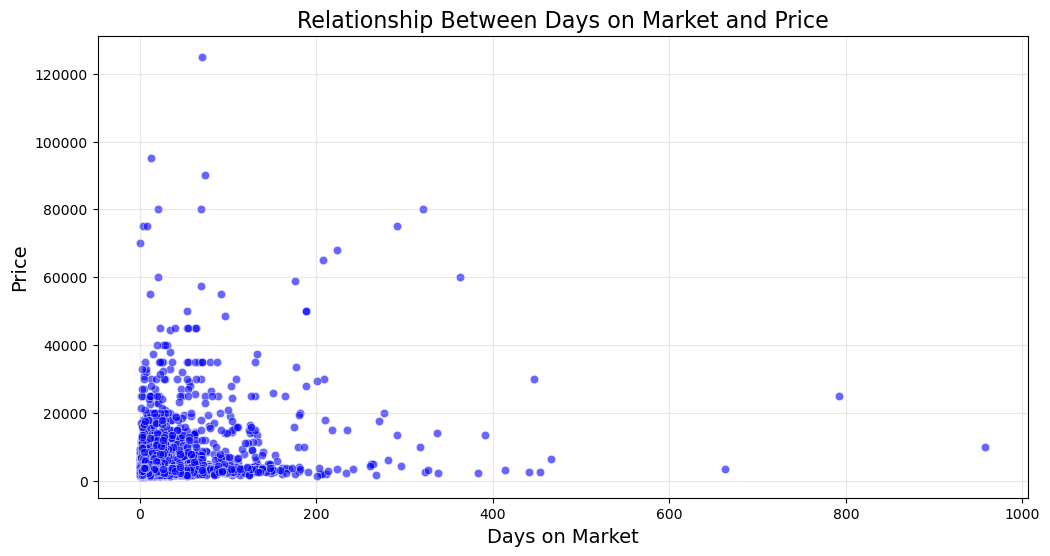

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of price vs. daysOnMarket
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_cleaned, x='daysOnMarket', y='price', alpha=0.6, color='blue')

# Add labels and title
plt.title('Relationship Between Days on Market and Price', fontsize=16)
plt.xlabel('Days on Market', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(alpha=0.3)

plt.show()


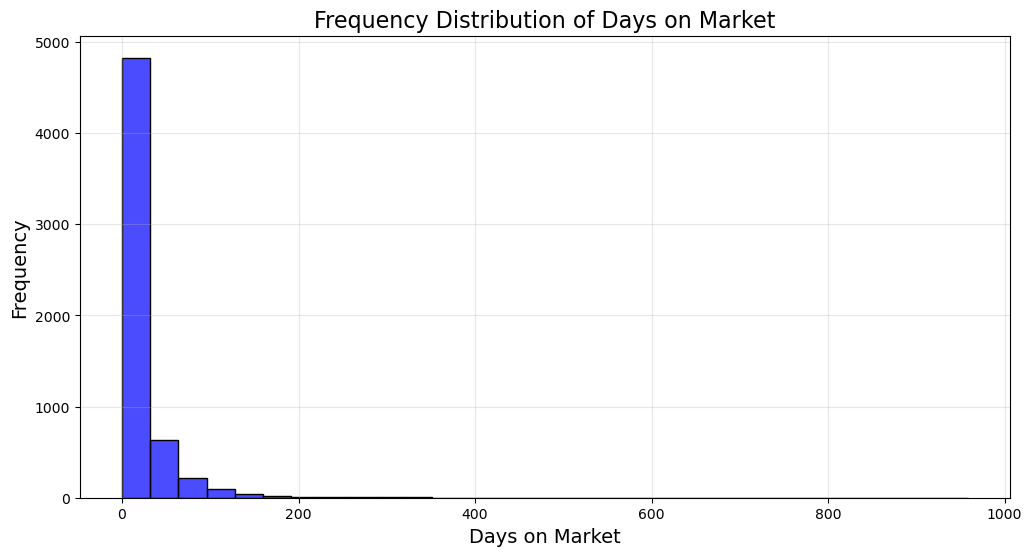

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of daysOnMarket
plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned['daysOnMarket'], bins=30, kde=False, color='blue', alpha=0.7)

# Add labels and title
plt.title('Frequency Distribution of Days on Market', fontsize=16)
plt.xlabel('Days on Market', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(alpha=0.3)

plt.show()


In [16]:
# Group by relevant features and calculate the median
grouped_median = df_cleaned.groupby(['propertyType', 'borough', 'beds'])['daysOnMarket'].transform('median')

# Fill missing values in 'daysOnMarket' using the grouped median
df_cleaned['daysOnMarket'] = df_cleaned['daysOnMarket'].fillna(grouped_median)

# Check if there are still missing values
print("Remaining missing values in 'daysOnMarket':", df_cleaned['daysOnMarket'].isnull().sum())

# Display a few rows to verify the results
print(df_cleaned[['propertyType', 'borough', 'beds', 'daysOnMarket']].head())

Remaining missing values in 'daysOnMarket': 0
  propertyType   borough  beds  daysOnMarket
0       rental  Brooklyn     1           1.0
1       rental  Brooklyn     2           4.0
2       rental  Brooklyn     1           4.0
3       rental  Brooklyn     1           6.0
4       rental  Brooklyn     3           7.0


In [17]:
# Missing values
missing_count_per_column = df_cleaned.isna().sum()
print(missing_count_per_column)

daysOnMarket                                       0
availableFrom                                      0
street                                             0
price                                              0
borough                                            0
zip                                                0
propertyType                                       0
beds                                               0
baths                                              0
latitude                                           0
longitude                                          0
hasVideo                                           0
PhotosNum                                          0
Number of Households                               0
Median Household Income                            0
Per Capita Income                                  0
Total Income Distribution                          0
Median Gross Rent                                  0
Median Home Value                             

In [18]:
# Save the cleaned DataFrame to a CSV file
output_file_path = 'no_missing_housing_data.csv'
df_cleaned.to_csv(output_file_path, index=False)

print(f"Cleaned data saved to {output_file_path}")

Cleaned data saved to no_missing_housing_data.csv
